# üò∑ Face Mask Detection Using Deep Learning (2025)

#### **üìåProject Overview**

This project focuses on building a deep learning model to detect whether a person is wearing a mask or not. It also integrates Explainable AI (XAI) techniques like Integrated Gradientsto interpret and visualize the model‚Äôs decisions at the pixel level.

#### üìä Dataset

The dataset contains labeled face images categorized into two classes:

With Mask  ‚Äì 6,800 images

Without Mask  ‚Äì 6,800 images
**Total: 13,600 images (Balanced classes)**

 **Data Distribution:**             
Training Set: 10,880 images (80%)              
‚ÄÉ‚ÄÉ- 5,440 with mask             
‚ÄÉ‚ÄÉ- 5,440 without mask                   

**Validation Set:** 1,360 images (10%)            
‚ÄÉ‚ÄÉ- 680 with mask           
‚ÄÉ‚ÄÉ- 680 without mask          

**Test Set:** 1,360 images (10%)            
‚ÄÉ‚ÄÉ- 680 with mask           
‚ÄÉ‚ÄÉ- 680 without mask           

#### ‚öôÔ∏è Model Architecture

The model is a custom Convolutional Neural Network (CNN) designed for binary image classification to detect the presence or absence of face masks. It processes RGB images resized to 128√ó128√ó3 and outputs class probabilities using a softmax layer.

Model Components:
Conv2D (32 filters, 3√ó3 kernel, ReLU activation):
Captures low-level visual features such as edges and simple textures from the input image.

MaxPooling2D (2√ó2):
Downsamples feature maps to reduce spatial dimensions, control overfitting, and increase computational efficiency.

Conv2D (64 filters, 3√ó3 kernel, ReLU activation):
Learns more complex and abstract patterns, such as facial regions and shapes.

MaxPooling2D (2√ó2):
Further reduces spatial resolution while retaining important features.

Flatten:
Converts the final 2D feature maps into a 1D vector to prepare for fully connected layers.

Dense (128 units, ReLU) + Dropout (0.5):
Learns high-level representations of the input. Dropout randomly deactivates 50% of neurons during training to improve generalization.

Dense (64 units, ReLU) + Dropout (0.5):
Adds additional abstraction and regularization before the final decision layer.

Dense (2 units, Softmax):
Outputs the final class probabilities for the two categories: "with_mask" and "without_mask".





##### **Training Details**
The model was trained on the processed dataset using **ImageDataGenerator** for real-time data augmentation, which helped improve generalization by applying transformations such as rotation, shifting, shearing, zooming, and horizontal flipping.

Training was performed over a maximum of 50 epochs with a batch size of 32. To avoid overfitting and optimize training efficiency, the training loop included:

EarlyStopping with patience=5, monitoring val_loss, and restore_best_weights=True.

This stopped training once no improvement was observed in validation loss for 5 consecutive epochs, restoring the weights from the best epoch.

ModelCheckpoint saved the model (b_model.h5) whenever validation accuracy improved.

Overall, the model showed strong learning stability, minimal overfitting, and high classification accuracy (~95.5%) on both validation and test sets.



#### üìà Model Evaluation

The model demonstrated strong and reliable performance on the held-out test set consisting of 1,511 images, achieving an overall accuracy of 92.85%. Both classes with mask and without mask were classified with balanced precision and recall, indicating no significant bias toward either class.

Key metrics include:

**Precision:**
‚Ä¢ With Mask: ~93.2%
‚Ä¢ Without Mask: ~92.4%

**Recall:**
‚Ä¢ With Mask: ~92.6%
‚Ä¢ Without Mask: ~93.0%

**F1-Score:**
‚Ä¢ ~92.7% for both classes

**False Positives:**  52 (unmasked individuals misclassified as wearing masks)

**False Negatives:**  57 (masked individuals misclassified as unmasked)

**ROC Curve & AUC:**
The model achieved an AUC of 0.98, demonstrating excellent class separability and low false positive rates.

**Training Accuracy**:   ~96%

**Validation Accuracy:** ~92%
This small gap indicates effective generalization and limited overfitting.



**Evaluation on Unseen Real-World Images**
The model was also tested on a custom set of unseen face images sourced from the web. It maintained an impressive accuracy of 96.24%, further proving its robustness and generalizability beyond the dataset it was trained on.

**üé• Live Webcam Inference**

A real-time webcam inference module was implemented to evaluate the model's live performance. The model was able to:

Detect **With Mask** faces with an average confidence of **93%**

Detect **"Without Mask"** faces with an average confidence of **83.65%**


#### **üëÅÔ∏è Explainable AI (XAI)**

To enhance transparency, Integrated Gradients (IG) was used to compute pixel-level attributions. These attributions were converted into heatmaps, overlaid on original images to visualize which regions contributed most to each prediction.

**Visualization Pipeline:**

Compute IG attributions for the predicted class

Generate a colored heatmap from the IG values

Superimpose the heatmap onto the input image

Display: Original | Heatmap | Overlay

This visual explanation aids in understanding model behavior and building trust in predictions.

#### **üìÅ Dataset Sources**


Kaggle Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


#### üë©‚Äçüíª**Contact**


üìå Project by: Nazanin Mahmoudy, 2025                 
üìß Email: nazaninmahmoudy@gmail.com                 
üîó GitHub: github.com/NazaninMahmoudi                    
üîó Kaggle: kaggle.com/nazaninmahmoudy                      



### Importing Libraries

In [1]:
#  General Utilities & Basic Processing
import os
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import cv2
import random

#  Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

#  Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

#  Model Evaluation & Metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

#  Model Explainability (XAI) Tools 
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries


 ### Preprocessing

#### Dataset Setup and Class Labels

In [2]:
with_mask_dir = 'D:\\Mask\\data\\with_mask'
without_mask_dir = 'D:\Mask\data\without_mask'

with_mask_files = os.listdir(with_mask_dir)
without_mask_files = os.listdir(without_mask_dir)
print("With mask images:", len(with_mask_files))
print("Without mask images:", len(without_mask_files))


class_names = ['with_mask', 'without_mask']


With mask images: 3725
Without mask images: 3828


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8956\3643260926.py:2: SyntaxWarning: invalid escape sequence '\M'
  without_mask_dir = 'D:\Mask\data\without_mask'


This code loads image file names from two folders. It also counts how many images are in each category and defines the class names for later use in training and prediction.

#### Loading and Preparing Image Data

In [3]:
data = []
labels = []

def load_and_process_image(path):
    img = Image.open(path).resize((128, 128)).convert('RGB')
    return np.array(img)

for f in with_mask_files:
    img_path = os.path.join(with_mask_dir, f)
    img = load_and_process_image(img_path)
    data.append(img)
    labels.append(1) 

for f in without_mask_files:
    img_path = os.path.join(without_mask_dir, f)
    img = load_and_process_image(img_path)
    data.append(img)
    labels.append(0)  

X = np.array(data)
Y = np.array(labels)

print("Data shape:", X.shape)
print("Labels shape:", Y.shape)

C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Data shape: (7553, 128, 128, 3)
Labels shape: (7553,)


This block loads all mask and non-mask images, resizes them to 128√ó128 pixels, and converts them into NumPy arrays. It also assigns labels (1 for with mask, 0 for without mask) to prepare the dataset for training. Finally, it stores the data and labels into arrays X and Y.

### Normalizing and Splitting the Dataset

In [4]:
X = X / 255.0

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

X_train_final, X_val, Y_train_final, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, stratify=Y_train)

print("Train shape:", X_train_final.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (5437, 128, 128, 3)
Validation shape: (605, 128, 128, 3)
Test shape: (1511, 128, 128, 3)


In this step, the image data is normalized by dividing pixel values by 255.0, effectively scaling all pixel intensities to the range [0, 1]. 

Before normalization, the image data consists of **pixel values** that typically range from 0 to 255 for each color channel (Red, Green, Blue). These values represent the intensity of each color **at every pixel**.


After normalization, the dataset is split into training, validation, and test sets using stratified sampling. Stratification ensures that each subset maintains the same proportion of classes (with mask and without mask) as the original dataset. 


**80%** of the data is used for training and testing.

From this **80%, 10%** is further separated as a validation set.

The remaining **20%** is used as the final test set to assess the model's generalization.

This careful splitting helps ensure that the model is trained on representative data and evaluated fairly.

### Model Architecture

In [5]:
num_of_classes = len(class_names)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(num_of_classes, activation='softmax')  
])


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The model is a Convolutional Neural Network (CNN) tailored for binary classification of face mask images. 

It begins with a convolutional layer containing **32 filters of size 3x3**, which extracts **low-level features **such as edges and textures from the input image.

This is followed by **a max-pooling layer** with a 2x2 window to reduce the spatial dimensions and computational load while retaining the most important information. 

A second convolutional layer with 64 filters of the same kernel size further captures more complex patterns. 

Another**max-pooling layer** again downsamples the feature maps. The resulting feature maps are then flattened into a **one-dimensional vector to feed into fully connected** layers. 

The first dense layer has 128 neurons with ReLU activation, introducing non-linearity and enabling the model to learn complex combinations of features.

Dropout with a rate of 0.5 is applied to **reduce overfitting** by randomly disabling neurons during training. This is followed by a second dense layer with 64 neurons and another dropout layer.

Finally, the output layer uses **a softmax activation** function to produce probabilities for each class ‚Äî ‚Äúwith mask‚Äù or ‚Äúwithout mask.‚Äù 

#### Compiling Model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Model Summary 

In [7]:
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                      ‚îÇ (None, 126, 126, 32)        ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)         ‚îÇ (None, 63, 63, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)                    ‚îÇ (None, 61, 61, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)       ‚îÇ (None, 30, 30, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)                    ‚îÇ (None, 57600)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 128)                 ‚îÇ       7,372,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)                  ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                      ‚îÇ (None, 2)                   ‚îÇ             130 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

he first conv layer has 896 parameters (32 filters of size 3x3 plus biases), producing 126x126x32 feature maps.
After max-pooling, the second conv layer uses 64 filters with 18,496 parameters, outputting 61x61x64 feature maps, then downsampled again. 

The flattened output of 57,600 features connects to a dense layer with 128 neurons, which contains the bulk of the model‚Äôs parameters ‚Äî about 7.37 million ‚Äî due to the large weight matrix.

Dropout layers are used to reduce overfitting. A smaller dense layer with 64 neurons adds 8,256 parameters, followed by the final output layer with 2 neurons and 130 parameters. 

Overall, the model has roughly 7.4 million trainable parameters, mostly concentrated in the dense layers, highlighting the computational cost at the classification stage.

### Training The model

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)



datagen.fit(X_train_final)  

checkpoint = ModelCheckpoint('b_model.h5', monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max', save_weights_only=False)

history = model.fit(
    datagen.flow(X_train_final, Y_train_final, batch_size=32),
    validation_data=(X_val, Y_val),
    epochs=50,
    callbacks=[checkpoint,early_stop],
    verbose=1
)


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 164ms/step - accuracy: 0.7171 - loss: 0.7183
Epoch 1: val_accuracy improved from -inf to 0.88760, saving model to b_model.h5


170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 173ms/step - accuracy: 0.7176 - loss: 0.7170 - val_accuracy: 0.8876 - val_loss: 0.3021
Epoch 2/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.8487 - loss: 0.3600
Epoch 2: val_accuracy did not improve from 0.88760
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 167ms/step - accuracy: 0.8487 - loss: 0.3599 - val_accuracy: 0.8826 - val_loss: 0.2873
Epoch 3/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 164ms/step - accuracy: 0.8619 - loss: 0.3338
Epoch 3: val_accuracy improved from 0.88760 to 0.90579, saving model to b_model.h5


170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 182ms/step - accuracy: 0.8619 - loss: 0.3338 - val_accuracy: 0.9058 - val_loss: 0.2514
Epoch 4/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.8736 - loss: 0.2947
Epoch 4: val_accuracy did not improve from 0.90579
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 165ms/step - accuracy: 0.8736 - loss: 0.2948 - val_accuracy: 0.8942 - val_loss: 0.2698
Epoch 5/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.8807 - loss: 0.2973
Epoch 5: val_accuracy did not improve from 0.90579
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 165ms/step - accuracy: 0.8807 - loss: 0.2973 - val_accuracy: 0.9041 - val_loss: 0.2365
Epoch 6/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.8763 - loss: 0.2809
Epoch 6: val_accuracy improved fro

170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.8764 - loss: 0.2809 - val_accuracy: 0.9074 - val_loss: 0.2387
Epoch 7/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.8806 - loss: 0.2929
Epoch 7: val_accuracy did not improve from 0.90744
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.8806 - loss: 0.2928 - val_accuracy: 0.9041 - val_loss: 0.2306
Epoch 8/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.8912 - loss: 0.2570
Epoch 8: val_accuracy improved from 0.90744 to 0.92727, saving model to b_model.h5


170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 167ms/step - accuracy: 0.8912 - loss: 0.2570 - val_accuracy: 0.9273 - val_loss: 0.2099
Epoch 9/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.8992 - loss: 0.2546
Epoch 9: val_accuracy did not improve from 0.92727
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.8992 - loss: 0.2546 - val_accuracy: 0.9107 - val_loss: 0.2141
Epoch 10/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 164ms/step - accuracy: 0.8979 - loss: 0.2533
Epoch 10: val_accuracy did not improve from 0.92727
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 167ms/step - accuracy: 0.8979 - loss: 0.2533 - val_accuracy: 0.9124 - val_loss: 0.2111
Epoch 11/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 171ms/step - accuracy: 0.9041 - loss: 0.2418
Epoch 11: val_accuracy did not 

170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.9016 - loss: 0.2460 - val_accuracy: 0.9289 - val_loss: 0.1917
Epoch 14/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.9218 - loss: 0.1952
Epoch 14: val_accuracy did not improve from 0.92893
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 165ms/step - accuracy: 0.9217 - loss: 0.1954 - val_accuracy: 0.9174 - val_loss: 0.1983
Epoch 15/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.9072 - loss: 0.2289
Epoch 15: val_accuracy did not improve from 0.92893
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 165ms/step - accuracy: 0.9072 - loss: 0.2289 - val_accuracy: 0.9157 - val_loss: 0.1972
Epoch 16/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.9176 - loss: 0.2217
Epoch 16: val_accuracy did no

170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.9184 - loss: 0.2161 - val_accuracy: 0.9339 - val_loss: 0.2026
Epoch 18/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.9194 - loss: 0.1885
Epoch 18: val_accuracy did not improve from 0.93388
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.9194 - loss: 0.1886 - val_accuracy: 0.9273 - val_loss: 0.1909
Epoch 19/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 164ms/step - accuracy: 0.9285 - loss: 0.1889
Epoch 19: val_accuracy did not improve from 0.93388
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 167ms/step - accuracy: 0.9285 - loss: 0.1890 - val_accuracy: 0.9339 - val_loss: 0.1890
Epoch 20/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.9259 - loss: 0.1930
Epoch 20: val_accuracy improv

170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.9259 - loss: 0.1931 - val_accuracy: 0.9405 - val_loss: 0.1722
Epoch 21/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.9287 - loss: 0.1875
Epoch 21: val_accuracy did not improve from 0.94050
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 165ms/step - accuracy: 0.9286 - loss: 0.1875 - val_accuracy: 0.9372 - val_loss: 0.1722
Epoch 22/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.9306 - loss: 0.1776
Epoch 22: val_accuracy did not improve from 0.94050
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.9306 - loss: 0.1776 - val_accuracy: 0.9190 - val_loss: 0.2236
Epoch 23/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 172ms/step - accuracy: 0.9291 - loss: 0.1945
Epoch 23: val_accuracy improv

170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 176ms/step - accuracy: 0.9291 - loss: 0.1945 - val_accuracy: 0.9421 - val_loss: 0.1749
Epoch 24/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 170ms/step - accuracy: 0.9299 - loss: 0.1831
Epoch 24: val_accuracy did not improve from 0.94215
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 173ms/step - accuracy: 0.9299 - loss: 0.1831 - val_accuracy: 0.9388 - val_loss: 0.1596
Epoch 25/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 167ms/step - accuracy: 0.9315 - loss: 0.1759
Epoch 25: val_accuracy improved from 0.94215 to 0.94545, saving model to b_model.h5


170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 171ms/step - accuracy: 0.9315 - loss: 0.1759 - val_accuracy: 0.9455 - val_loss: 0.1534
Epoch 26/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 166ms/step - accuracy: 0.9404 - loss: 0.1813
Epoch 26: val_accuracy improved from 0.94545 to 0.94711, saving model to b_model.h5


170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 169ms/step - accuracy: 0.9403 - loss: 0.1813 - val_accuracy: 0.9471 - val_loss: 0.1530
Epoch 27/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.9379 - loss: 0.1643
Epoch 27: val_accuracy did not improve from 0.94711
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 166ms/step - accuracy: 0.9379 - loss: 0.1643 - val_accuracy: 0.9355 - val_loss: 0.1612
Epoch 28/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 171ms/step - accuracy: 0.9387 - loss: 0.1529
Epoch 28: val_accuracy did not improve from 0.94711
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 174ms/step - accuracy: 0.9386 - loss: 0.1529 - val_accuracy: 0.9438 - val_loss: 0.1419
Epoch 29/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.9344 - loss: 0.1665
Epoch 29: val_accuracy improv

170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 167ms/step - accuracy: 0.9344 - loss: 0.1666 - val_accuracy: 0.9521 - val_loss: 0.1668
Epoch 30/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 168ms/step - accuracy: 0.9353 - loss: 0.1741
Epoch 30: val_accuracy did not improve from 0.95207
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 171ms/step - accuracy: 0.9353 - loss: 0.1741 - val_accuracy: 0.9471 - val_loss: 0.1452
Epoch 31/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 171ms/step - accuracy: 0.9419 - loss: 0.1556
Epoch 31: val_accuracy did not improve from 0.95207
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 174ms/step - accuracy: 0.9419 - loss: 0.1557 - val_accuracy: 0.9455 - val_loss: 0.1812
Epoch 32/50
170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 164ms/step - accuracy: 0.9389 - loss: 0.1677
Epoch 32: val_accuracy did no

170/170 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 168ms/step - accuracy: 0.9416 - loss: 0.1668 - val_accuracy: 0.9554 - val_loss: 0.1486


This section of the code trains the nural net using augmented image data and includes mechanisms to improve **generalization and avoid overfitting.** 

The training data is passed through an ImageDataGenerator, which applies real-time data augmentation techniques .
The model is trained for up to 50 epochs with a batch size of 32.

To prevent overfitting, an early stopping callback is used, which monitors the validation loss (val_loss) and stops training if it does not improve for five consecutive epochs, while also restoring the best weights obtained during training.

Additionally, a model checkpoint is configured to save the best-performing model (based on validation accuracy) to a file named b_model.h5. Throughout training, detailed progress and performance metrics are displayed using verbose=1.

### Model Evaluation

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Y_pred_prob = model.predict(X_test)
Y_pred = np.argmax(Y_pred_prob, axis=1)

print("Classification Report:\n")
print(classification_report(Y_test, Y_pred, target_names=['Without Mask', 'With Mask']))

48/48 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 29ms/step - accuracy: 0.9531 - loss: 0.1341
Test Loss: 0.1270
Test Accuracy: 0.9550
48/48 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step
Classification Report:

              precision    recall  f1-score   support

Without Mask       0.96      0.95      0.96       766
   With Mask       0.95      0.96      0.95       745

    accuracy                           0.95      1511
   macro avg       0.96      0.96      0.95      1511
weighted avg       0.96      0.95      0.95      1511



**Precision**: Both classes have precision around 0.95‚Äì0.96. Precision measures how many of the predicted positives were actually correct. This means when the model predicts either "With Mask" or "Without Mask", it is correct about 95‚Äì96% of the time. High precision values indicate the model has a low false positive rate.

**Recall**: The recall scores for both classes are also about 0.95‚Äì0.96. Recall evaluates how many actual positive instances were correctly identified. This suggests that the model successfully detects 95‚Äì96% of both masked and unmasked faces, showing a low false negative rate.

**F1-score**: The harmonic mean of precision and recall (F1-score) is approximately 0.95 for both classes. This reflects a strong balance between precision and recall, meaning the model does not disproportionately favor one class over the other.

**Support**: The test set is well-balanced, consisting of 766 samples for the "Without Mask" class and 745 samples for the "With Mask" class. This balance ensures that evaluation metrics reflect the model‚Äôs performance fairly across both categories.

**Overall Accuracy**: The model achieves a high accuracy of 95.5%, meaning it correctly classifies about 95 out of every 100 images in the test set.

**Macro Average**: This metric calculates the average performance across classes equally, regardless of class size. The macro average of around 0.95‚Äì0.96 confirms that the model performs consistently well on both classes.

**Weighted Average**: This score takes the support (number of samples) of each class into account when averaging. Since the dataset is fairly balanced, the weighted average is very close to the macro average, reinforcing the model‚Äôs robustness.

#### Confusion Matrix

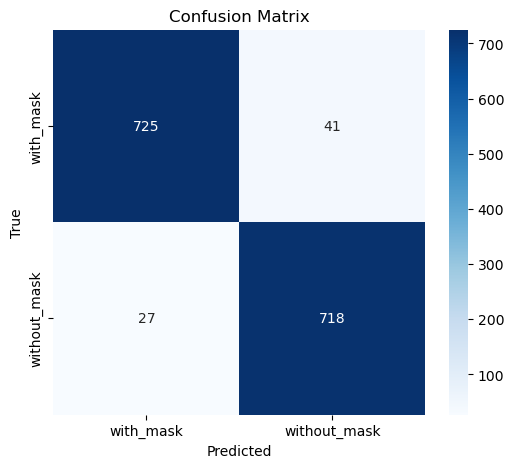

In [11]:
y_true = Y_test
cm = confusion_matrix(y_true, Y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Anylizing Confusion Matrix

The model correctly predicted 729 out of 770 "with mask" images and 718 out of 745 "without mask" images . Meaning a solid generalization ability on unseen test data, with reliable performance across both classes.

The precision for the **with mask** class is **approximately 96.4%,** meaning that when the model predicts a person is wearing a mask, it's correct nearly all the time. The recall for this class is slightly lower, around 94.7%, indicating a few masked individuals are being misclassified as unmasked.

For the **without mas"** class, the precision is about **94.4%**, while the recall is roughly **96.4%**. This symmetry implies that the model handles both classes with comparable effectiveness, without skewing heavily toward one side.

In terms of misclassifications:

27 false positives occurred, where unmasked individuals were wrongly predicted as masked.

41 false negatives happened, where masked individuals were classified as unmasked.



 #### ROC Curve Score

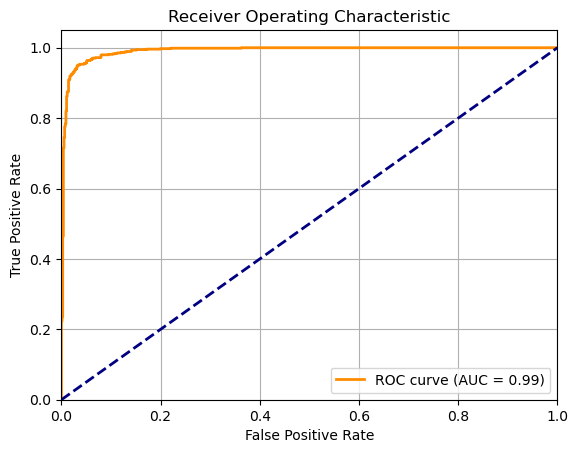

In [12]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The ROC curve visualizes the model's performance across different threshold values by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR).

AUC (Area Under Curve) = 0.99
This score is exceptional, indicating that the model can distinguish between positive and negative classes with 98% accuracy on average.

The orange ROC curve hugs the top-left corner of the graph, which is **ideal**.

This means the model has a very high sensitivity (recall) and a very low false positive rate, maintaining a strong separation between classes.

#### Training & Validation Performance Over Epochs

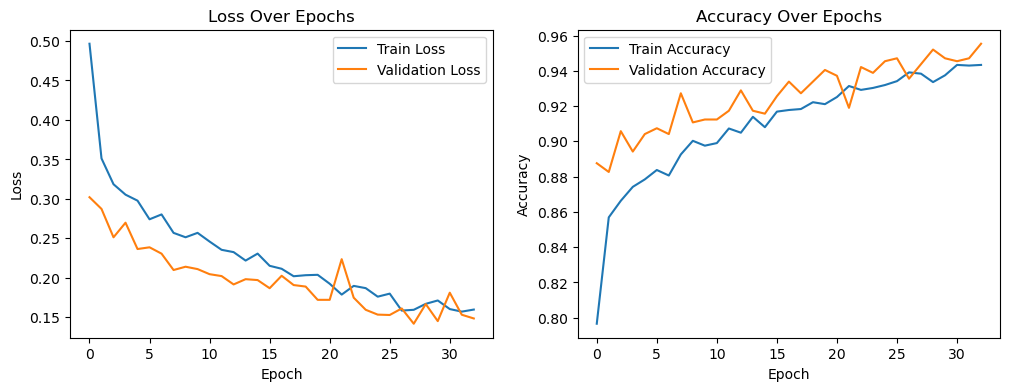

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##### Loss Over Epochs 

Training Loss (Blue): The training loss consistently decreased throughout the training process, eventually stabilizing around 0.13, indicating smooth and effective learning.

Validation Loss (Orange): Validation loss followed a similar decreasing trend and remained close to the training loss, settling at around 0.12.

Interpretation:
The small gap between training and validation loss and the absence of any sharp increase in validation loss suggest that **overfitting is not present**. The model has generalized well to unseen data.



##### Accuracy Over Epochs (
Training Accuracy: Started around 79% and steadily increased to about 95.3%.

Validation Accuracy: Progressed closely alongside training accuracy and ended at about 95.5%, even slightly exceeding training accuracy in later epochs.

 Interpretation:
The high and closely matched training and validation accuracy curves show that the model is learning effectively without **underfitting or overfitting**.

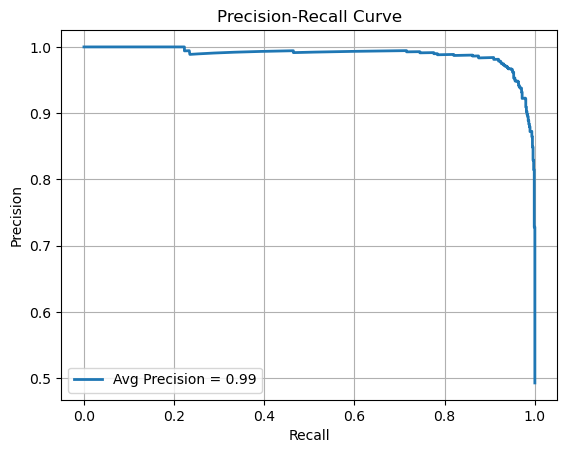

In [14]:
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_prob[:, 1])
ap_score = average_precision_score(Y_test, Y_pred_prob[:, 1])

plt.figure()
plt.plot(recall, precision, lw=2, label=f'Avg Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


The Precision-Recall curve demonstrates the trade-off between precision and recall at various classification thresholds. 

Average Precision (AP) = 0.99
This is a very high score, indicating that the model maintains both high precision and high recall across a wide range of thresholds.

The curve is tightly concentrated in the upper-right corner, which is **ideal**

This means that the model produces very few false positives while also successfully identifying most of the true positives.

### Evaluation On Unseen Data

In [15]:
urls = [
    "https://images.unsplash.com/photo-1564564244660-5d73c057f2d2?fm=jpg&q=60&w=3000",
    "https://azmirror.com/wp-content/uploads/2020/06/covid-mask-black-man-getty-scaled.jpg",
    "https://www.shutterstock.com/image-photo/young-man-background-open-air-260nw-1671464413.jpg",
    "https://images.pexels.com/photos/1181690/pexels-photo-1181690.jpeg?cs=srgb&dl=pexels-divinetechygirl-1181690.jpg&fm=jpg"
]

In this code , we have got the links of the pictures we would like to perdict 

In [16]:
def load_image_from_url(url, target_size=(128,128)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img = img.resize(target_size)
    img_array = np.array(img).astype(np.float32) / 255.0 
    return img_array

This function fetches an image from a URL, converts it to RGB, resizes it to 128√ó128 pixels, normalizes pixel values to the [0, 1] range, and returns it as a float32 NumPy array ready for model input.


Processing image 1/4
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step


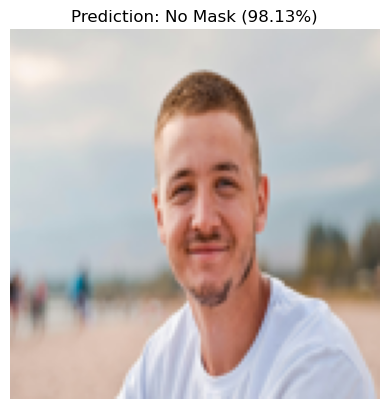

Prediction: No Mask
Confidence: 98.13%

Processing image 2/4
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step


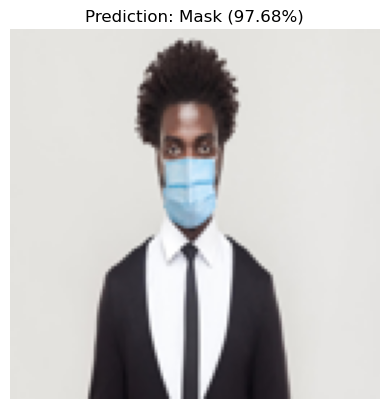

Prediction: Mask
Confidence: 97.68%

Processing image 3/4
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step


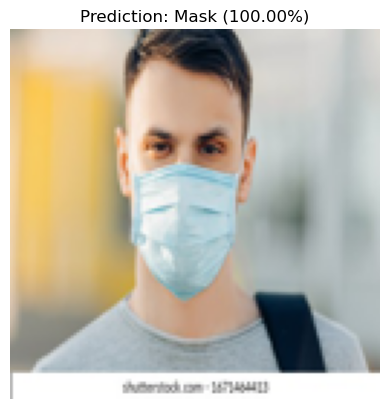

Prediction: Mask
Confidence: 100.00%

Processing image 4/4
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step


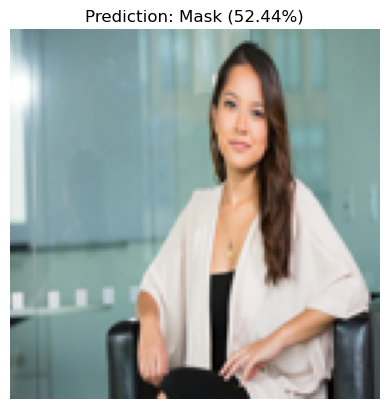

Prediction: Mask
Confidence: 52.44%


In [17]:
def predict_single_image(model, img_array, class_names=["No Mask", "Mask"]):
    img_input = np.expand_dims(img_array, axis=0)  
    pred_prob = model.predict(img_input)[0]
    pred_label = np.argmax(pred_prob)
    confidence = pred_prob[pred_label] * 100

    plt.imshow((img_array * 255).astype(np.uint8))
    plt.axis('off')
    plt.title(f"Prediction: {class_names[pred_label]} ({confidence:.2f}%)")
    plt.show()

    print(f"Prediction: {class_names[pred_label]}")
    print(f"Confidence: {confidence:.2f}%")


for i, url in enumerate(urls):
    print(f"\nProcessing image {i+1}/{len(urls)}")
    try:
        img_array = load_image_from_url(url)
        predict_single_image(model, img_array)
    except Exception as e:
        print(f"Error processing image {i+1}: {e}")

### Explainable Artificial Intelligence (XAI)

#### integrated_gradients

In [18]:
def integrated_gradients(model, img_input, target_class_idx, baseline=None, steps=50):
    if baseline is None:
        baseline = np.zeros(img_input.shape).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    img_input = img_input.astype(np.float32)
    img_input = tf.expand_dims(img_input, axis=0)
    baseline = tf.expand_dims(baseline, axis=0)
    avg_grads = tf.zeros_like(img_input, dtype=tf.float32)

    for alpha in np.linspace(0, 1.0, steps):
        interpolated = baseline + alpha * (img_input - baseline)
        with tf.GradientTape() as tape:
            tape.watch(interpolated)
            preds = model(interpolated)
            class_score = preds[:, target_class_idx]
        grads = tape.gradient(class_score, interpolated)
        avg_grads += grads / steps

    integrated_grads = (img_input - baseline) * avg_grads
    return integrated_grads[0].numpy()



Calculates Integrated Gradients for a given input image and target class. It approximates feature attributions by averaging gradients along interpolated inputs between a baseline (default zero) and the original image.

The result highlights which pixels most influence the prediction for a specific class.



#### generate_colored_igrads_heatmap

In [19]:
def generate_colored_igrads_heatmap(igrads):
    igrads_magnitude = np.mean(np.abs(igrads), axis=-1)
    norm = (igrads_magnitude - igrads_magnitude.min()) / (igrads_magnitude.max() - igrads_magnitude.min() + 1e-8)
    igrads_uint8 = np.uint8(norm * 255)
    heatmap = cv2.applyColorMap(igrads_uint8, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    return heatmap



This function takes the pixel-wise attribution values from Integrated Gradients and converts them into a visually interpretable heatmap. 

It normalizes the magnitude of attributions across pixels, then applies a color gradient (using OpenCV‚Äôs JET colormap) to emphasize areas that have the strongest positive impact on the model‚Äôs decision. This makes it easier to see which parts of the image contributed most to the prediction.

#### superimposition of attribution heatmaps

In [20]:
def superimpose_attributions(img_array, attributions, alpha=0.6):
    attr_norm = (attributions - attributions.min()) / (attributions.max() - attributions.min() + 1e-8)
    attr_uint8 = np.uint8(attr_norm * 255)
    heatmap = cv2.applyColorMap(attr_uint8, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    img_uint8 = np.uint8(img_array * 255)
    superimposed_img = cv2.addWeighted(img_uint8, 1 - alpha, heatmap, alpha, 0)
    return superimposed_img



This function overlays a colored heatmap of attribution scores onto the original image, highlighting important areas that influenced the model‚Äôs prediction.

### Integrated Gradients Prediction and Visualization 

In [21]:
def predict_and_visualize_igrads_unified(model, inputs, input_type="array", class_names=["No Mask", "Mask"], num_samples=5):
    if input_type == "url":
        images = []
        for url in inputs:
            try:
                img_array = load_image_from_url(url) 
                images.append(img_array)
            except Exception:
                pass
        if not images:
            return

    elif input_type == "array":
        if len(inputs) < num_samples:
            images = inputs
        else:
            indices = random.sample(range(len(inputs)), num_samples)
            images = [inputs[i] for i in indices]

    else:
        raise ValueError("input_type must be 'url' or 'array'")

    for img_array in images:
        try:
            preds = model.predict(np.expand_dims(img_array, axis=0))
            pred_class = np.argmax(preds[0])

            igrads = integrated_gradients(model, img_array, pred_class)
            colored_heatmap = generate_colored_igrads_heatmap(igrads)
            superimposed_img = superimpose_attributions(img_array, np.mean(igrads, axis=-1))

            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(img_array)
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(colored_heatmap)
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(superimposed_img)
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        except Exception:
            pass


This function does two main things:

It works with test images from the dataset (in array form and taking in random)

It handles new, unseen images loaded from URLs

For either case, it goes through each image, predicts its class using the trained model, and uses Integrated Gradients Attribution (EIA) to figure out which pixels mattered most for the prediction.

Then, it creates a colorful heatmap and overlays it on the original image. 

#### Unseen Pictures

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step


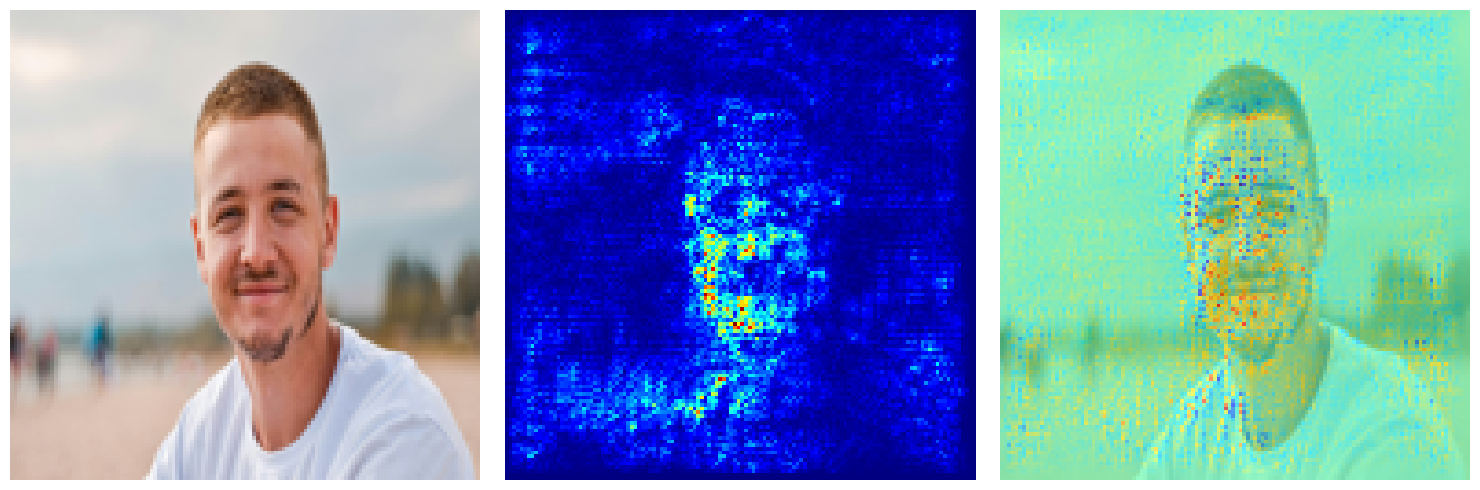

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step


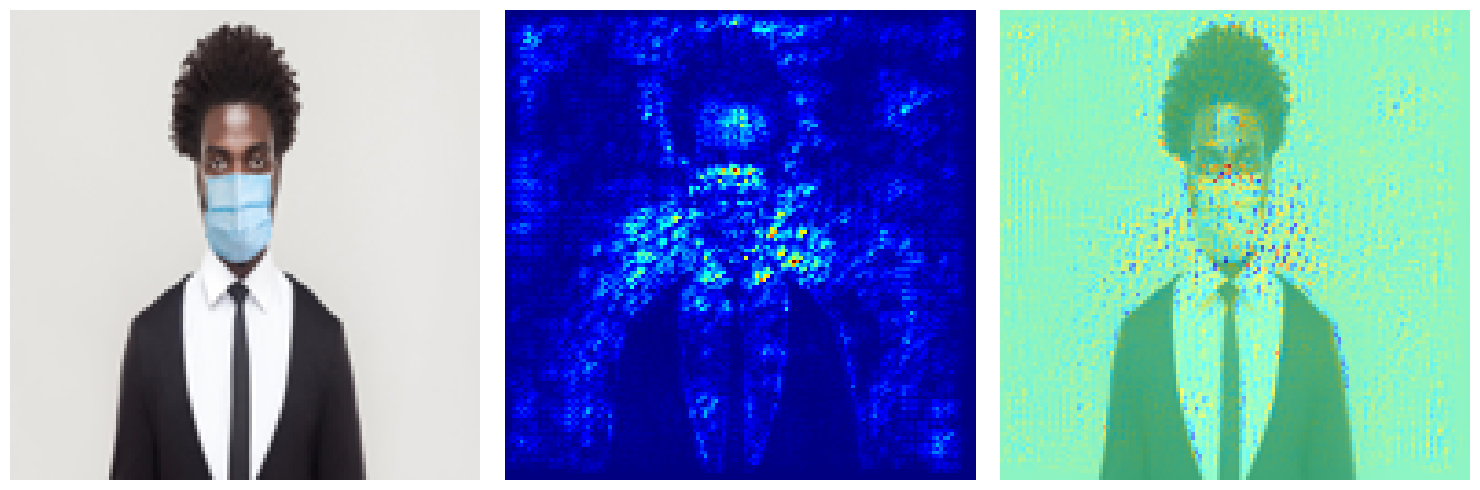

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step


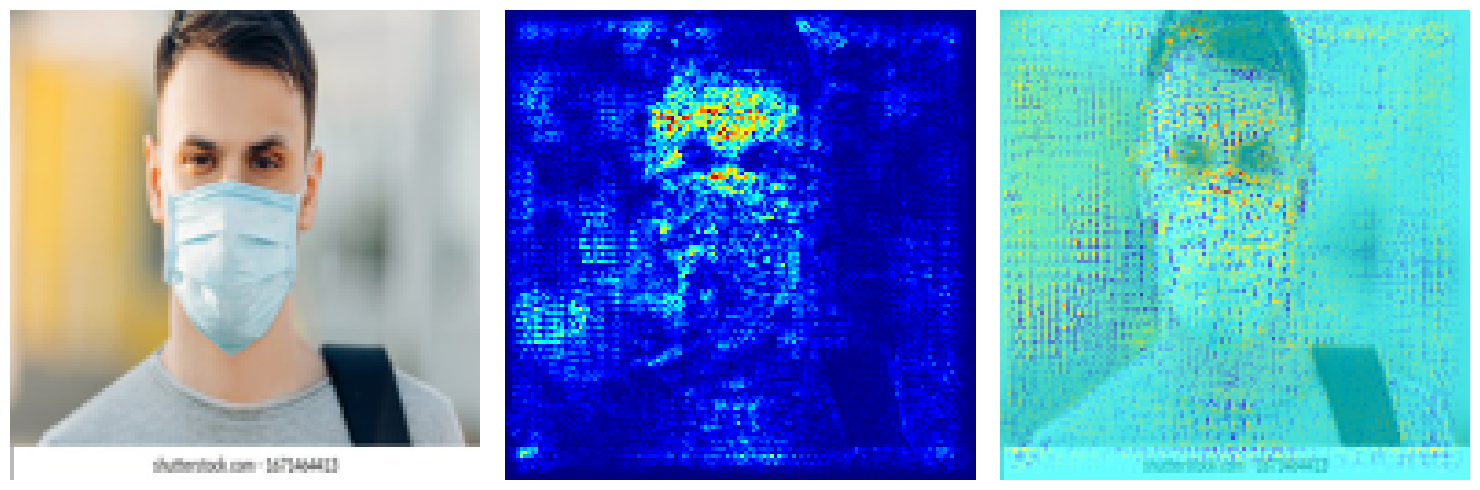

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step


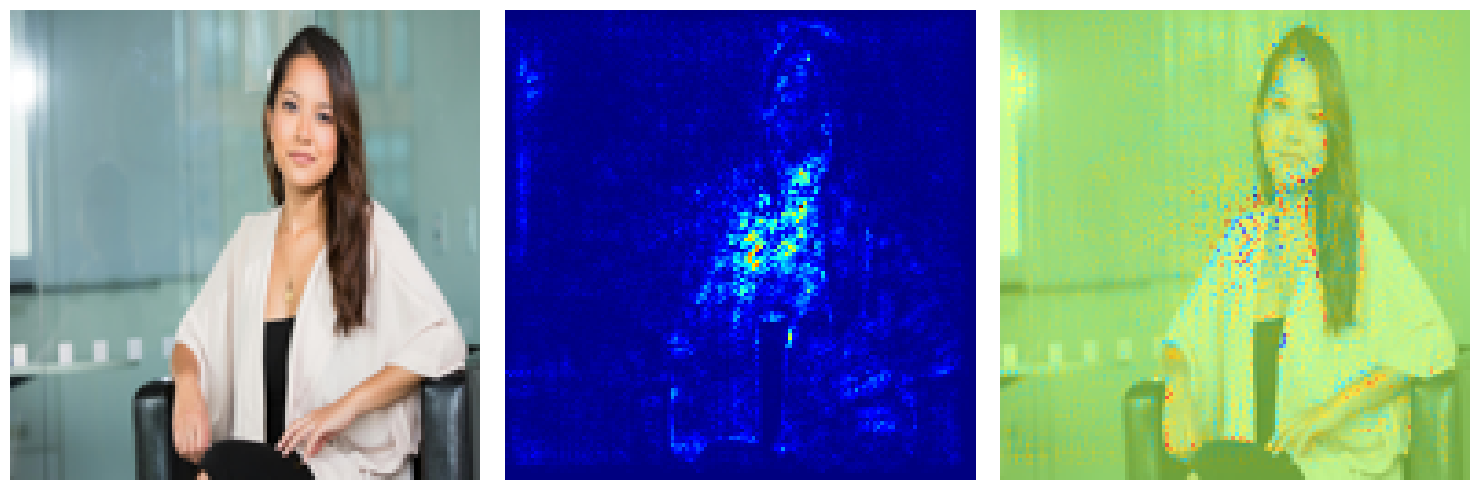

In [22]:
predict_and_visualize_igrads_unified(model, inputs=urls, input_type="url")



#### Test Images

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step


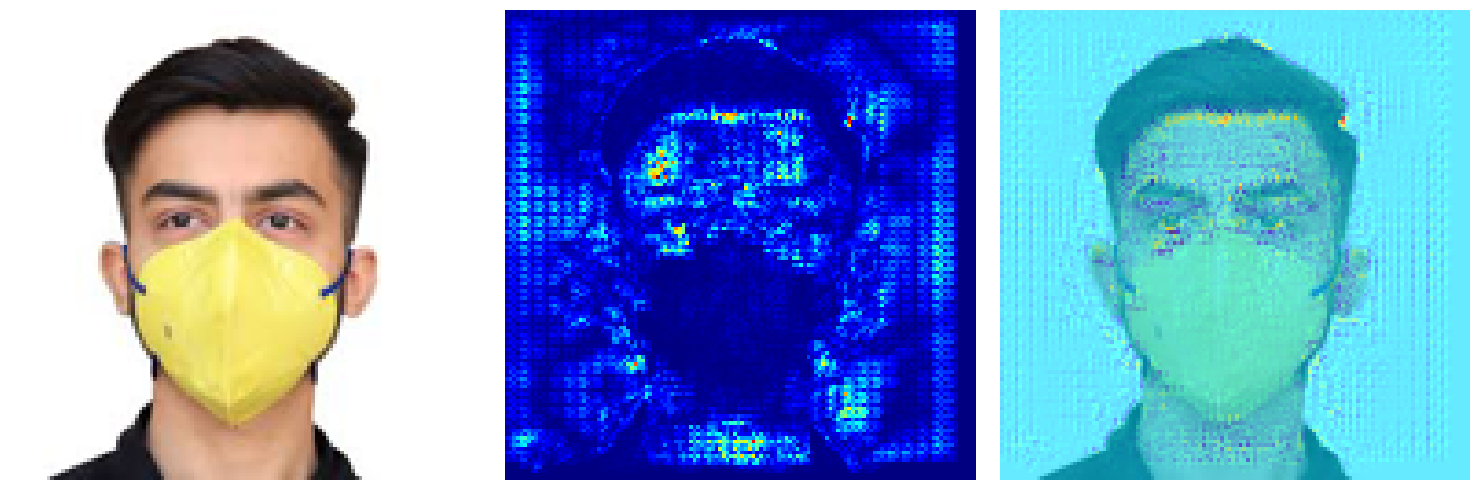

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step


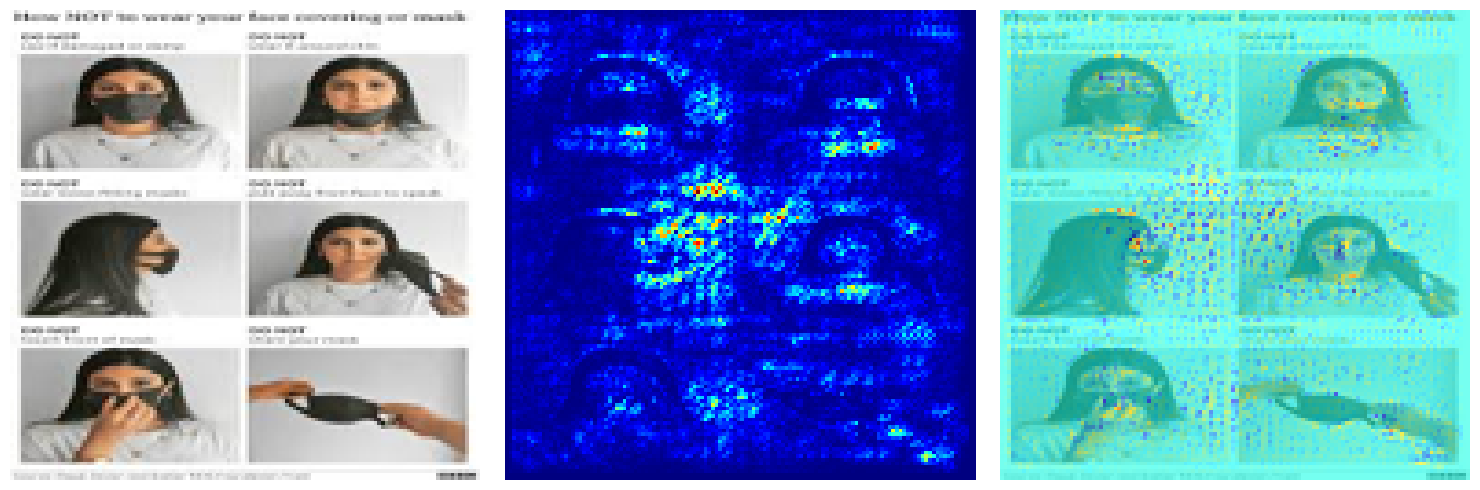

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step


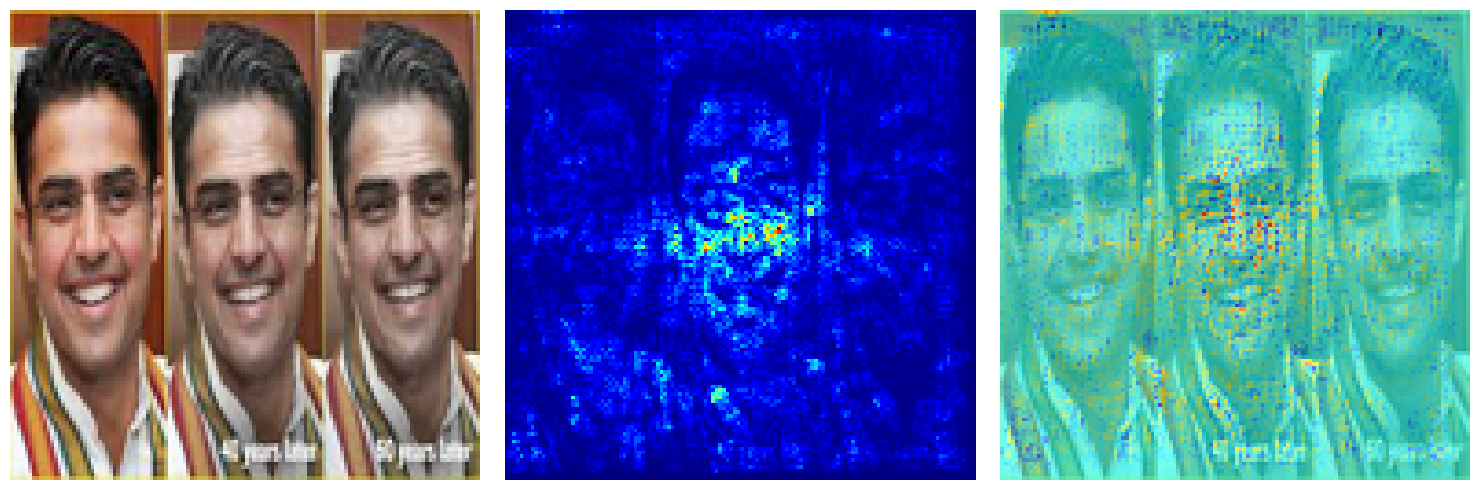

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step


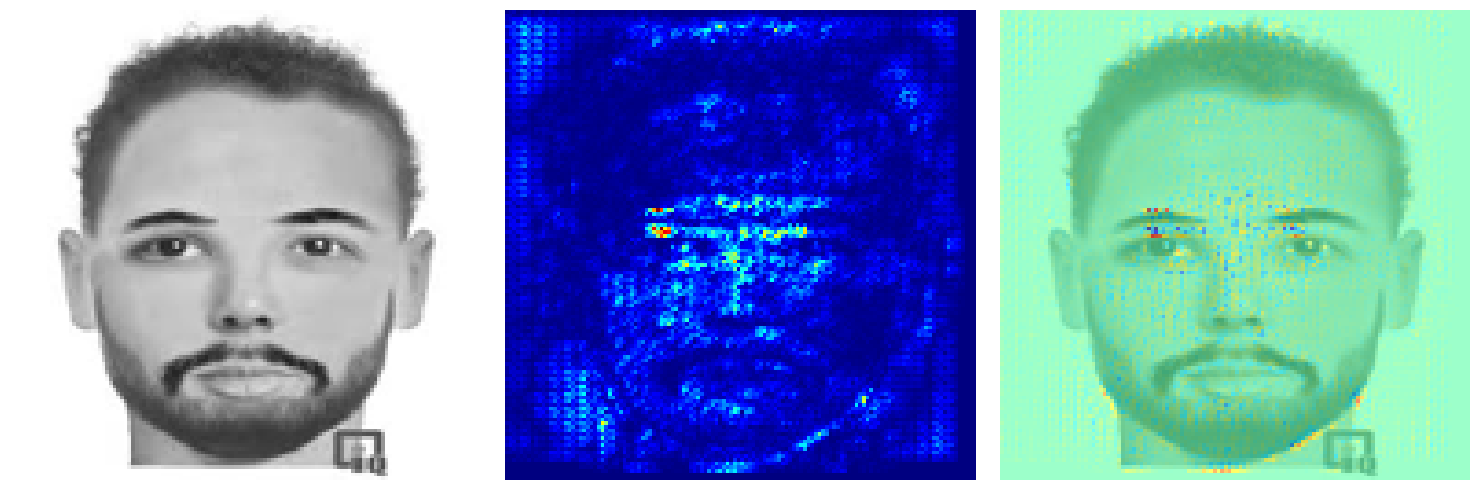

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step


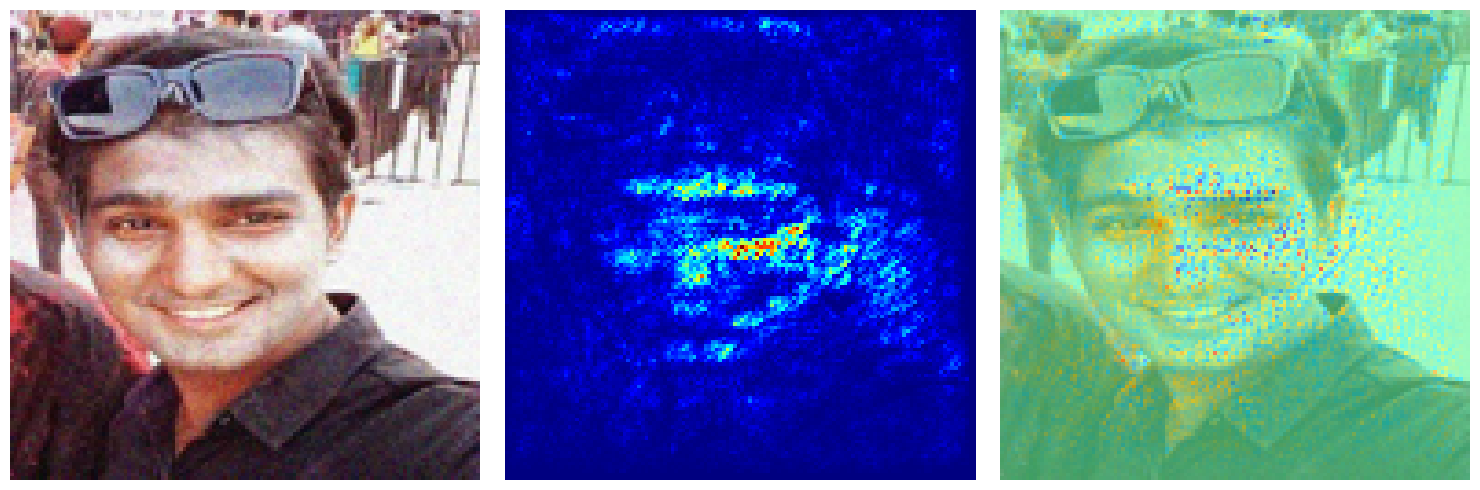

In [23]:
predict_and_visualize_igrads_unified(model, inputs=X_test, input_type="array", num_samples=5)


As we can see ,the model shows overall good performance, with its attention primarily focused on the face region in most cases. 

In most pictures , the heatmaps clearly highlight the key facial features (eyes, mouth, mask area), while the background is largely ignored.

Additionally, we provided images in the Unseen Data category that are intentionally more challenging for the model, and it still demonstrates a reasonable level of attention on the face region.

### Live Webcam Testing 

In [24]:
model.save("b_model.h5")


In [25]:
def preprocess_webcam_frame(frame):
    frame = cv2.resize(frame, (128, 128))                  
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)         
    frame = frame / 255.0                                  
    frame = np.expand_dims(frame, axis=0)                  
    return frame


In [29]:
from tensorflow.keras.models import load_model

model = load_model("b_model.h5")
class_names = ["Without Mask", "With Mask"] 

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    input_frame = preprocess_webcam_frame(frame)   

    prediction = model.predict(input_frame)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = np.max(prediction)

    if predicted_class == "Without Mask":
        color = (0, 0, 255) 
    else:
        color = (0, 255, 0) 

    label = f"{predicted_class} ({confidence*100:.2f}%)"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.imshow('Mask Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 95ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

### **üéØ Conclosion**

Despite being trained on a relatively simple, two-class dataset and using a lightweight, non-advanced CNN architecture, the model successfully demonstrated robust performance in both offline testing and real-time webcam scenarios. 

The final accuracy surpassed 92% on the test set and even maintained over 80% confidence in live detection, proving its reliability in standard lighting and frontal facial conditions.

The use of data augmentation techniques such as rotation, zoom, shear, and horizontal flipping significantly contributed to the model's generalization ability. These strategies simulated real-world variability and reduced the risk of overfitting, especially given the model's limited depth.

Overall, this project highlights that even with modest resources and a lightweight architecture, it is possible to build an effective face mask detection system, especially when combined with smart training strategies like early stopping, checkpointing, and augmentation.